### **Example Problem: Heat Diffusion in a Bar**

Consider 1D steady-state diffusion at heat in a bar. The bar has a length of $5m$, a cross-sectional area of $0.1m^2$ and a thermal conductivity of $100W/mK$. The temperature at the left end of the bar $(T_A)$ is $100^{\circ}C$ and the temperature at the right end $(T_B)$ is $200^{\circ}C$. There is a constant heat source of $1000W/m^3$ in the bar. The temperature field in the bar is governed by the 1D steady-state diffusion equation.


\begin{equation}
\frac{d}{dx}\left(k\frac{dT}{dx}\right) + S = 0
\end{equation}


In [2]:
#Required modules for matrices and plotting
import numpy
import matplotlib.pyplot as plt

#Makes matplotlib plots appear in the notebook instead of a separate window
%matplotlib inline

In [3]:
#Given values
cond = 100
bar_length = 5
temp_left = 100
temp_right = 200
area = 0.1
heat_source = 1000

#Defining some variables
ncell = 5

#Defining coordinates for cell faces
nfaces = numpy.linspace(0, bar_length, ncell+1)

#Printing the face coordinate array
print ("The face coordinates array:",nfaces)

#Defining coordinates for cell centroids
ncentroids = 0.5 * (nfaces[1:] + nfaces[0:-1])

#Printing the cell centroids array
print ("The cell centroids array: ",ncentroids)

#Calculating length of each cell
cell_length = nfaces[1:] - nfaces[0:-1]

#Calculating distance between each cell centroid
dcentroids = ncentroids[1:] - ncentroids[0:-1]

#Boundary cells difference from the wall
dLeft = (ncentroids[0] - nfaces[0])   
dRight = (nfaces[-1] - ncentroids[-1])

#Appending boundary values
dcentroids = numpy.hstack([dLeft,dcentroids,dRight])

cell_volume = area*cell_length




#Calculating the matrix coefficients

#Diffusive heat flux
DA = area*numpy.divide(cond, dcentroids)

#Su and Sp are the heat source terms
Sp = numpy.zeros(ncell)      

Sp[0] = -numpy.copy(DA[0])   #copy vs deepcopy?
Sp[-1] = -numpy.copy(DA[-1])

Su = heat_source*cell_volume

#Values for the boundary cells
Su[0] = Su[0] + numpy.copy(DA[0])*temp_left  
Su[-1] = Su[-1] + numpy.copy(DA[-1])*temp_right

al = numpy.copy(DA[0:-1]) 

ar = numpy.copy(DA[1:])

al[0] = 0
ar[-1] = 0

#Finally calculating the ap coefficient
ap = numpy.copy(ar) + numpy.copy(al) - numpy.copy(Sp) 
#print (ap)

The face coordinates array: [0. 1. 2. 3. 4. 5.]
The cell centroids array:  [0.5 1.5 2.5 3.5 4.5]


### Creating and solving the matrix

In [14]:
matrix_A = numpy.zeros([ncell, ncell])
vector_B = numpy.zeros(ncell)

#Filling the coefficients..(NOT THE MOST EFFICIENT METHOD!!)

for i in range(ncell):

#for left boundary cell
    if  i == 0:
        matrix_A[i,i] = ap[i]
        #print (ap[i])
        matrix_A[i, i+1] = -1*ar[i]
        #print (ar[i])

#for right boundary cell
    elif i == ncell-1:
        matrix_A[i,i] = ap[i]
        matrix_A[i,i-1] = -1*al[i]
        
#for interior cells
    else:
        matrix_A[i,i] = ap[i]
        matrix_A[i,i+1] = -1*ar[i]
        matrix_A[i,i-1] = -1*al[i]
        
#source term vector       
    vector_B[i] = Su[i]

### Plotting and comparison with analytical solution

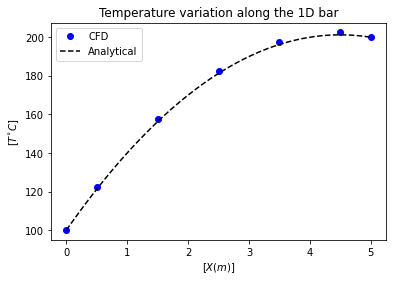

In [16]:
#Solving
vector_T = numpy.linalg.solve(matrix_A, vector_B)
#print (vector_T)

#Solving Analytically

x_Analytical = numpy.linspace(0,bar_length,100)
T_Analytical = temp_left + x_Analytical * ((temp_right - temp_left) / bar_length) + \         #continuation
(heat_source*x_Analytical)*(bar_length*numpy.ones(len(x_Analytical)) - x_Analytical)/(2*cond) #array creation for subtraction

#Temperature values on Y-axis
temp_plotting = numpy.hstack([temp_left, numpy.copy(vector_T), temp_right])

#Bar length on X-axis
x_plotting = numpy.hstack([nfaces[0],numpy.copy(ncentroids),nfaces[-1]])

plt.plot(x_plotting,temp_plotting,'bo', marker = 'o', label = 'CFD')
plt.plot(x_Analytical,T_Analytical, 'k--', label = 'Analytical')
plt.title("Temperature variation along the 1D bar")
plt.xlabel("$[X(m)]$")
plt.ylabel("$[T^{\circ}C]$")
plt.legend(loc='best')